# Examples week 4
## Day 1
### The `praw` library

In [2]:
# In week 3 you've learned to work with the Wikipedia REST API. Many other sites also 
# have an API, such as Reddit. This API uses authentication, which means it's a bit harder than the
# Wikipedia API to use. Because of that, it's easier to use a library to do the difficult stuff for you. 
# We're going to use the 'praw' library. To install it, open a terminal and type 'pip install praw'
# 
# You first need to create credentials for this app, and you also need to make a Reddit account first. 
# After that, follow this tutorial (http://www.storybench.org/how-to-scrape-reddit-with-python/)
# until the heading about the 'shebang line'.
#
# To use praw, we first need to import the library
import praw

In [3]:
# We need to define two 'keys' to use with the Reddit API. These are supposed to be secret, 
# so enter them here, don't share them with anyone! We also need a 'user agent string', 
# simply replace the place where it says 'YOUR_NAME' with your Reddit username
#
# Note how we CAPITALIZE the variable names. This is a convention
# to indicate that these are 'constants' and shouldn't be changed
CLIENT_ID = "CLIENT_ID_HERE"
CLIENT_SECRET = "CLIENT_SECRET_HERE"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/YOUR_NAME)"

In [4]:
# Okay! Now we can create an instance of the api by using this command
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

In [5]:
# To test the api, see if this returns 'True'
api.read_only

True

In [6]:
# Let's try getting the 10 'hottest' submission on the popular 'Ask Reddit' subreddit
# Note the 'limit' argument, we can pass these with an equals sign, just like variable declaration
submissions = api.subreddit('askReddit').hot(limit = 10)
submissions

In [14]:
# As you can see this is a 'generator', we can use 'for' to loop through these submissions
for sub in submissions:
    # Note how these objects don't use dictionaries, and you access
    # data by the dot notation. These data points are called object attributes.    
    print(sub.title)
    
    # You can even get a nested property this way
    print(sub.author.name)

AskReddit has reached 20 million subscribers!
teknrd
What are some awful things from the 70s, 80s, and 90s everyone seems to not talk about?
MARCO-POLLOO
Tomorrow is the 17 year anniversary of the terror attacks of September 11th, 2001. Where were you that day?
notanotheredditmovie
What nice things did we used to have, until they got ruined by idiots?
ghost0427
What's a product or service you should NEVER cheap out on?
Kill_Dr_Phil
People who draw furry porn and other obscure types of nsfw art for living, what was your weirdest commission?
Rage_Roll
What is the sluttiest thing you've done?
bool_idiot_is_true
What is something that someone, who has never been poor before, wouldn’t understand about being poor?
fwilliams13
After having already given it a try, what type of person will you never date again?
generik89
If money was no object, what's the coolest yet hugely impractical addition you would make to your home?
hwoodo94


In [13]:
# There are lots of properties ('attributes') that come with every submission, you can use python's vars() 
# method to check them out. We need to convert the submissions to a list first to do that. We also need to
# re-do the method, because a 'generator' is over after one go
submissions = api.subreddit('askReddit').hot(limit = 10)
submissions = list(submissions)
vars(submissions[0])

{'_reddit': <praw.reddit.Reddit at 0x10c6bc860>,
 'approved_at_utc': None,
 'subreddit': Subreddit(display_name='AskReddit'),
 'selftext': "We'll use this as a celebration post. Subreddit rules still apply but otherwise congratulate yourselves for being awesome! We're running this thread in a breaking news format. We do not require the top post to be a question ",
 'author_fullname': 't2_f40iy',
 'link_flair_text': 'Breaking News',
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'AskReddit has reached 20 million subscribers!',
 'link_flair_richtext': [{'e': 'text', 't': 'Breaking News'}],
 'subreddit_name_prefixed': 'r/AskReddit',
 'hidden': False,
 'pwls': 6,
 'link_flair_css_class': 'breaking-news',
 'downs': 0,
 'parent_whitelist_status': 'all_ads',
 'hide_score': False,
 'name': 't3_9d1w5x',
 'quarantine': False,
 'link_flair_text_color': 'light',
 'author_flair_background_color': None,
 'subreddit_type': 'public',
 'ups': 41774,
 'domain': 'self.AskReddit',
 

In [17]:
# To get the comments for a submission you can use the 'comments' attribute of a submission,
# we do need to a little magic to filter out the comments that aren't really comments
# but 'read more' buttons
# We're just going to take the first submission from the list as an example
for comment in submissions[0].comments:
    # Check if this is a 'more comments' node, skip those
    # 'continue' wil go through the next loop
    if isinstance(comment, praw.models.MoreComments):
        continue
        
    # Limit the body text to the first 100 chars
    print(comment.body[0:100])

rarely post on this subreddit but definitely my favorite to browse before I go to bed at night, and 
This subreddit is why I don't sleep well at night
Hi there! Your post was removed because it uses the text box. Per rule 1, use of the text box is pro
Legitimate question - what is a baby unicorn called?
Your clones are very impressive you must be very proud. 
What's AskReddit and how do I subscribe?
Is this the part when daddy comes to beat us with his jumper cables?
Are you guys the first subreddit to reach 20 million subscribers?
I’d like to take a moment to thank Askreddit for generating so much content for buzzfeed. And with T
Huh, enough Ass Credit for 20 million. 

Congratulations!
Have been a long-time fan of this sub, and I’m extremely pleased to see it continuing to be so succe
/u/TheJackal8 and /u/ani625 in honor of 20 million subscribers can we ban /u/Jakeable for [texting m
That's like a million original content creators!
I wanna thank the other 19,999,999 people here who t

### Pandas

In [19]:
# Pandas is a library to do analysis on data sets
# You need to import pandas, but you give it another name, because programmers are lazy
import pandas as pd # Note 'as pd', you now use 'pd' instead of 'pandas'

# You've already seen many variable types, most prominently dicts and lists, pandas introduces its own
# datatypes: the one-dimensional Series, and the multi-dimensional DataFrame.

# Let's look at the Series first, you can create a series from any list of values
data = [5, 1, 8, 2, 2, 5, 2, 3, 6, 2, 3, 9, 1, 12, 2]
series = pd.Series(data)

# Pandas automatically creates an index starting at zero, just like a regular list
print(series)

0      5
1      1
2      8
3      2
4      2
5      5
6      2
7      3
8      6
9      2
10     3
11     9
12     1
13    12
14     2
dtype: int64


In [20]:
# To get just the values again use the 'values' attribute
series.values

array([ 5,  1,  8,  2,  2,  5,  2,  3,  6,  2,  3,  9,  1, 12,  2])

In [26]:
# And for indexes, just use 'index'
series.index

RangeIndex(start=0, stop=15, step=1)

In [55]:
# Pandas has a lot of methods you can use on its Series and DataFrames. 
print(series.max()) # Largest value

print(series.min()) # Smallest value

print(series.mean()) # Average value

print(series.median()) # Median value

print(series.sum()) # Sum of all values

12
1
4.2
3.0
63


In [57]:
# Another really useful feature is value_counts(), which counts the times a value
# occurs in a series
print(series.value_counts())

2     5
5     2
3     2
1     2
12    1
9     1
8     1
6     1
dtype: int64


In [58]:
# Using the head() and tail() methods you can view the first and last entries,
# by default the first five (head) or last five (tail)
series.head()

0    5
1    1
2    8
3    2
4    2
dtype: int64

In [59]:
# DataFrames add one or more Series together, a lot like an Excel sheet. Or in 
# Python terms: a list with dicts
data = [
    { "name" : "Tinus", "species" : "hamster", "age" : 7 }, # Note how we put this dict on one line for brevity
    { "name" : "Barrie", "species" : "monkey", "age" : 5 },
    { "name" : "Hans", "species" : "badger", "age" : 12 }
]

df = pd.DataFrame(data) # 'df' is another convention, an abbrevation for dataframe
df # This will show a fancy table in Jupyter Notebooks

,age,name,species
0,7,Tinus,hamster
1,5,Barrie,monkey
2,12,Hans,badger


In [60]:
# To inspect one column only, you can use the [] notation, just like a dict or list
df["age"]

0     7
1     5
2    12
Name: age, dtype: int64

In [62]:
# And because this column is a series, you can use the same methods that we've used before
print(df["age"].mean())
print(df["age"].sum())

8.0
24


## Day 2
### Loading CSV files

In [28]:
# Pandas has methods for importing structered data formats like CSV, JSON and Excel
# They also convert directly to dataframes. Let's try importing a CSV file that contains
# the names of all children born in 2014, including gender and number of times a name was given
df = pd.read_csv("svb-names-2014.csv")
df.head() # Show the first five names

,name,number,gender
0,Sophie,836,1
1,Daan,751,0
2,Emma,728,1
3,Bram,727,0
4,Milan,700,0


### Filtering and sorting data

In [43]:
# As you can see this list is ordered on the number of times a name is given
# The 'gender' column indicates whether the child was a boy (0) or a girl (1)
df["gender"].value_counts()

1    13402
0    11657
Name: gender, dtype: int64

In [44]:
# Pandas uses the bracket syntax ([]) to filter the data as well, for example, this
# is how we only get the top 3 boys names
df[df["gender"] == 0].head(3) # Remember that head shows the first x items from the beginning

,name,number,gender
1,Daan,751,0
3,Bram,727,0
4,Milan,700,0


In [45]:
# And here are the girls names
df[df["gender"] == 1].head(3)

,name,number,gender
0,Sophie,836,1
2,Emma,728,1
8,Julia,676,1


In [46]:
# Pandas DataFrames also have a query() method that might be more intuitive
df.query("gender == 1").head(3)

,name,number,gender
0,Sophie,836,1
2,Emma,728,1
8,Julia,676,1


In [47]:
# We can also add a new column to the dataset, simply by assigning it and specifying the
# values. Note that this 'broadcasts' to the entire dataset, it's basically like 
# doing a for loop.
# Let's add a column that adds the length of the name
df["name_length"] = df["name"].str.len()
df.head()

,name,number,gender,name_length
0,Sophie,836,1,6
1,Daan,751,0,4
2,Emma,728,1,4
3,Bram,727,0,4
4,Milan,700,0,5


In [48]:
# And now, let's sort the list by this new column, so we can see what is the longest name
# given to a child born in 2004
df.sort_values("name_length").head()

,name,number,gender,name_length
9264,Al,1,0,2
13128,Li,1,0,2
24308,To,1,1,2
12463,Ji,1,0,2
16220,Yk,1,0,2


In [49]:
# Ah! We get shortest instead, because sort_values by default sorts ascending (low to high), 
# let's fix that
df.sort_values("name_length", ascending=False).head()

,name,number,gender,name_length
24495,Vlinder-Jezzebelle,1,1,18
10114,D'Angelo-Valentino,1,0,18
11434,Ghëarmiangelijanno,1,0,18
16848,Angenieta-Jantina,1,1,17
10669,Djievano-Sonnekay,1,0,17


In [50]:
# You can also do string operations, for example, 
# let's see the most popular double names (names with a dash)
df[df["name"].str.contains("-")].sort_values("number", ascending=False).head()

,name,number,gender,name_length
1711,Anne-Sophie,14,1,11
1911,Jazz-Lynn,12,1,9
2027,Anne-Fleur,11,1,10
2143,Jay-Jay,10,0,7
2183,Anne-Lynn,10,1,9


In [51]:
# We can use filtering with multiple conditions as well, 
# let's find out all girls names that start with 'Piet'
df[(df["name"].str.startswith("Piet")) & (df["gender"] == 1)] # Note the brackets and the & operator

,name,number,gender,name_length
1458,Pieternella,17,1,11
5769,Pietertje,3,1,9
8630,Pieternel,2,1,9
22779,Pieta,1,1,5


In [41]:
# The 'groupby' method can be very handy to apply operations on a series of values, for example to sum() 
# both genders in the dataset, you can try this
df.groupby("gender").sum()

,number
gender,
0,88765
1,84851


In [63]:
# Combining a couple of methods we've learned now let's do something complex
# Let's find out the most populair initial letter for names.
# First we need an extra column that just has the first letter of the name in the row
df["first"] = df["name"].str[0]

# Now we group by this letter, sum all the values in the 'number' column, sort them with highest value first
# and the print the first five results
df.groupby("first")["number"].sum().sort_values(ascending = False).head()

first
J    18913
L    16394
M    16183
S    15491
A    11697
Name: number, dtype: int64

### Visualisations: bar chart

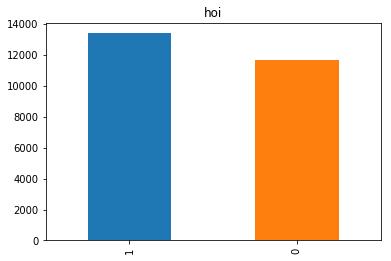

In [29]:
# Pandas has built-in visualisations (called 'plots') using the matplotlib library
# Let's make a bar chart showing the number of boys and girls names
# First we need to use our old friend value_counts() to get the number of boys (gender == 0)
# and girls (gender == 1)
genders = df.gender.value_counts()

# Now we can use plot to get a bar chart
genders.plot(kind = 'bar')

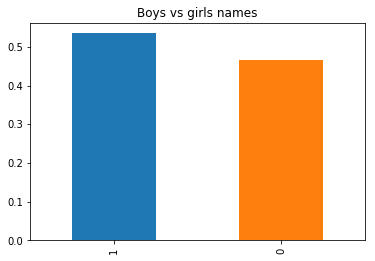

In [66]:
# This is nice, but we're missing a couple of things: we'd rather have percentages instead
# of values. A title would be nice. And finally we should have 'girl' and 'boy' instead of '1' and '0'
# Let's start with the values, we can use normalize = True to get normalized values,
# also let's add a title in the plot() method
genders = df.gender.value_counts(normalize = True)
genders.plot(kind = 'bar', title = 'Boys vs girls names')

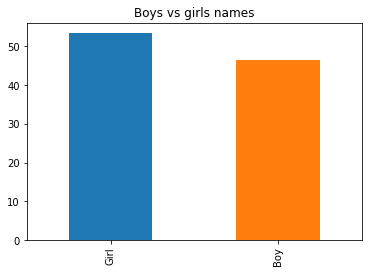

In [34]:
# Better! However, those fractions are a bit hard too read, Let's multiply by 100 to get percentages
genders = genders * 100

# We also want 'girl' and 'boys' instead of '1' and '0',
# we can do that by changing the index of the Series
genders.index = ['Girl', 'Boy']

# Awesome. Let's plot again!
genders.plot(kind = 'bar', title = 'Boys vs girls names')

### Visualisations: histogram

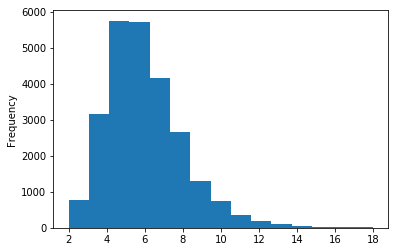

In [45]:
# A histogram is another type of visualisation that groups values together,
# using a histogram we can show how name length is distributed
# First we make a new column containing string length
df["name_length"] = df["name"].str.len() # Note how we need to use 'str' first

# Now we can create a histogram, we do this by giving 'hist' as the argument to the 
# plot() method and indicating the number of bins
# Try changing the number of bins and see what happens
df["name_length"].plot(kind = 'hist', bins = 15)

### Working with temporal data

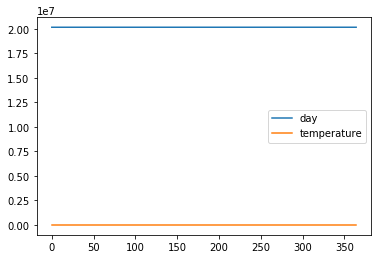

In [139]:
# Temporal data is data with specific moments or periods in time
# Let's look at an example: temperatures as measured in De Bilt (close to Utrecht)
# First let's load the data, this contains one column ('day') with dates, and one column
# with the average temperature on that day
temp = pd.read_csv("temperatures.csv")

# Let's plot this data, note that just using 'plot' uses the line chart by default,
# which is what we want
temp.plot()

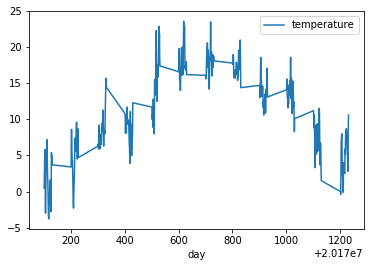

In [137]:
# That looks weird, but this is because it interprets the index as the x-ax, and the columns
# with the dates and temperatures as two lines to plot, let's fix that by putting the
# the dates on the x-ax
temp.plot(x = 'day')

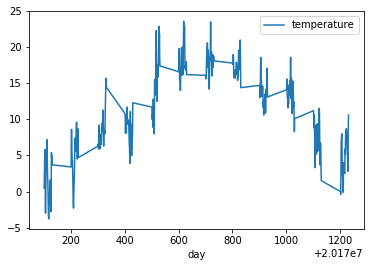

In [146]:
# Another option would be to tell the read_csv method that we want the first column as the index
temp = pd.read_csv("temperatures.csv", index_col=0)
temp.plot()

In [ ]:
# Data is now plotted on the correct axes, but the graphic still looks weird.
# You can see from the x-ax what's going on: Pandas interprets the dates as 
# integers instead of dates! We need to fix that by letting pandas know it's a date.
# We can do that from the import, so let's adapt our read_csv statement once again

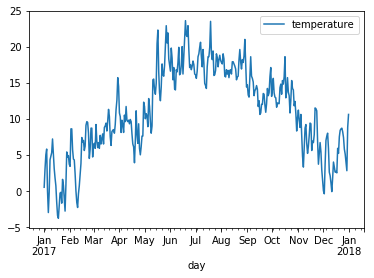

In [148]:
temp = pd.read_csv("temperatures.csv", index_col=0, parse_dates=True)
temp.plot()

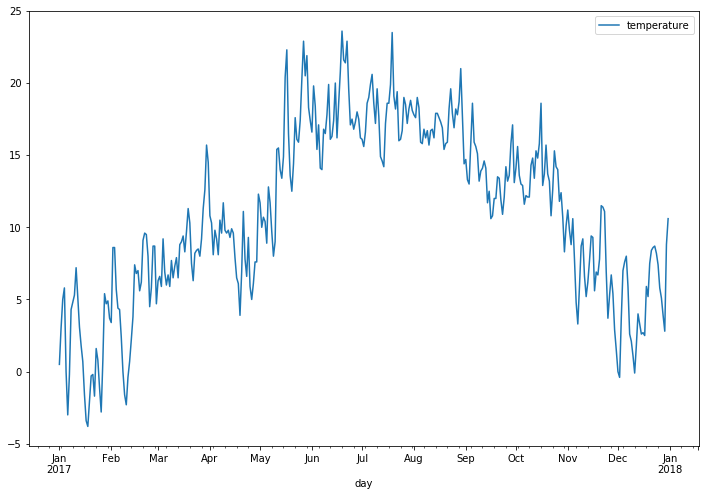

In [150]:
# Excellent, let's make it a bit bigger by using the figsize argument
temp.plot(figsize = [12,8])

### Resampling and combining data

In [68]:
# We now know how to load a CSV files with temporal data, but what if we don't want to show
# the temperatures per day, but on average per month?
# For that we need to resample
# First, let's load the csv file again
temp = pd.read_csv("temperatures.csv", index_col=0, parse_dates=True)

# Now we need to use the resample() method with the dataframe and a resampling rule. In this case,
# 'M' stands for month
temp_monthly = temp.resample("M")
print(temp_monthly)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]


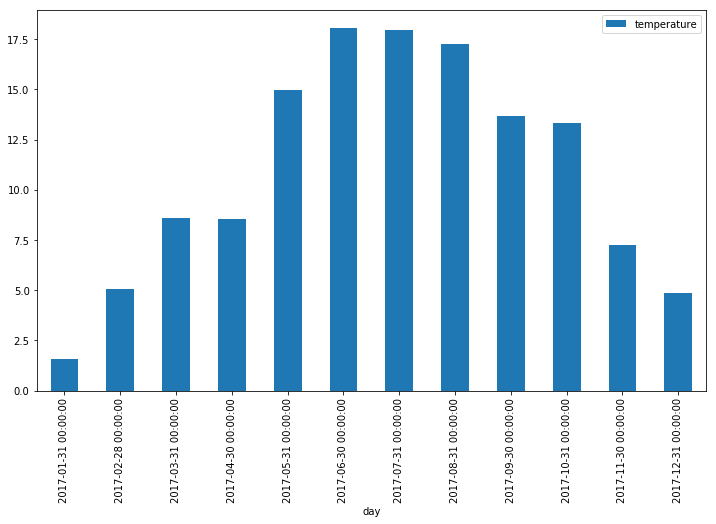

In [71]:
# This only gives a 'resampler', but it doesn't give any values yet. We need to tell pandas
# what to do with the data it now has contained for every month. Let's get the mean (average)
# of every month
temp_monthly.mean()

# That's more like it, now we can simply use plot() again, and let's use a
# bar chart, because that is a bit nicer on the eyes, also let's make this plot a bit bigger
temp_monthly.mean().plot(kind='bar', figsize = (12,7))

In [227]:
# Here's an exercise: in this folder there's a csv file called 'temperatures-average.csv'
# This file contains the highest, average and lowest temperatures measured in the last
# 300 years per month. 
# Load this file and combine the 'average' column with the existing 'ts' dataframe, and
# plot the average temperature together with the 2017 values as a bar chart so you can compare
# 2017's temperatures with the average temperature